# Predicting heart disease using Machine Learning

> The goal of the notebook is to train a model based on the medical attributes of the patients/people and to predict if a person has heart disease or not based on the medical attributes of the people. 

#### Steps to take:-

* Problem Definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## Problem Definition

> Given clinical parameters about a particular patient, can we predict whether or not they have heart disease?

## Data

* The original data for training the model came from -> 'https://archive.ics.uci.edu/ml/datasets/heart+Disease'

* There is a slightly different version of these dataset available in kaggle -> 'https://www.kaggle.com/ronitf/heart-disease-uci'


## Evaluation

> If we get more than 95% accuracy with the trained model predicting if the patient has heart disease or not during the proof of concept of the model, then we can carry on improving/ expanding the heart disease model.

## Features

> These are the various different information about the features of the dataset that are used here. 

**Create Data Dictionary**

<!-- * age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fbs -> fasting blood sugar > 120 mg/dl('1' = true, '0' =false)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exang -> exercise induced angina('1'=yes, '0'=no )
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect -->
* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)





### Importing all of the tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, precision_score,recall_score,f1_score,plot_roc_curve

In [3]:
df=pd.read_csv('./dataset/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

## EDA or Exploratory Data Analysis

> The goal here is to find out more about the data and become a subject matter expert on the dataset that we are working with

* What questions are we trying to solve?
* What kind og data we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of the data?

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

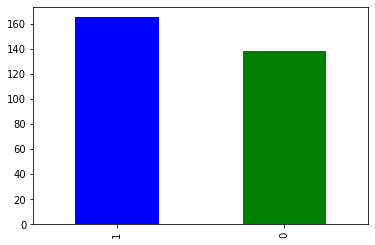

In [6]:
df['target'].value_counts().plot(kind='bar', color=['Blue', 'Green'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df['sex'].sum()

207

In [11]:
df['sex'].unique()

array([1, 0])

In [12]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

## Sex VS Heart Disease

In [13]:
# Comparing the target and the sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


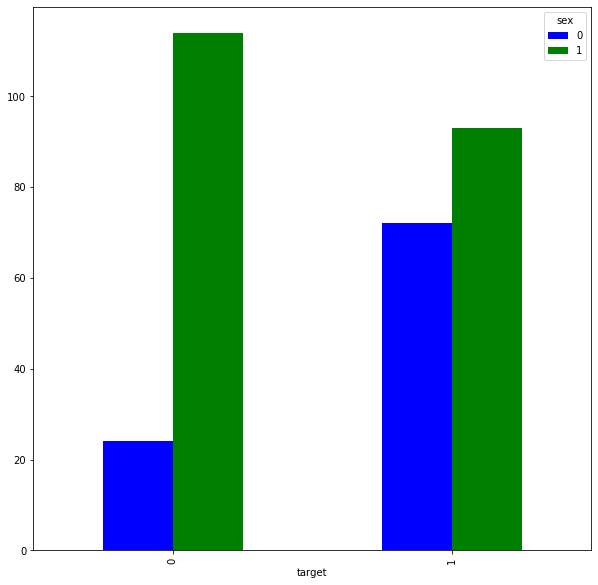

In [14]:
pd.crosstab(df.target,df.sex).plot(kind='bar', figsize=(10,10), color=['Blue','Green'])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

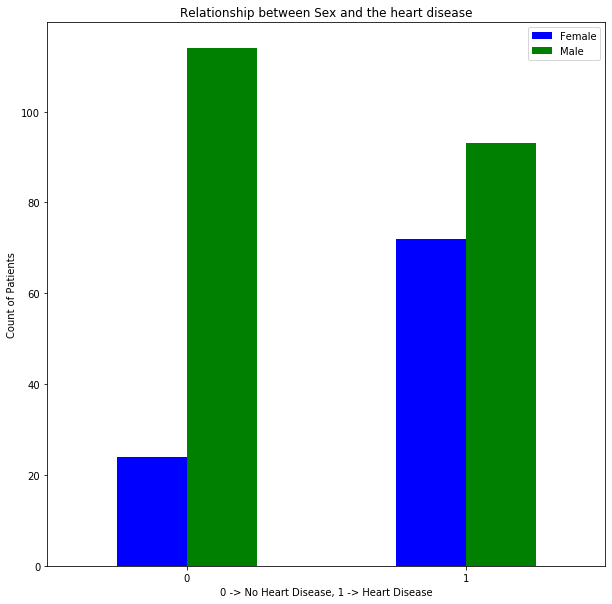

In [15]:
## Visualizing the sex and target column for easier understanding and for others to look at a glance and see what's happening.

pd.crosstab(df.target,df.sex).plot(kind='bar', figsize=(10,10), color=['Blue','Green'])

plt.title('Relationship between Sex and the heart disease')
plt.xlabel('0 -> No Heart Disease, 1 -> Heart Disease')
plt.ylabel('Count of Patients')

plt.legend(['Female','Male'])
plt.xticks(rotation=0)

In [16]:
df['thalach'].value_counts() # Length: 91 means that this feature has 91 different/unique values in this feature column

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age Vs Max Heart Rate(Thalach) For Heart Disease

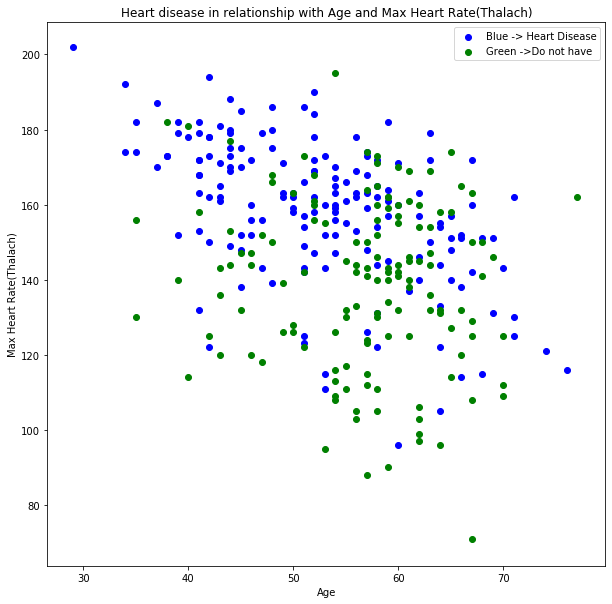

In [17]:
plt.figure(figsize=(10,10))

# Plotting with positive(Have Heart Disease) examples
plt.scatter(df.age[df['target'] ==1], df.thalach[df.target==1], c='Blue')

# Plotting with negative(Do not have Heart Disease) examples
plt.scatter(df.age[df['target'] ==0], df.thalach[df.target==0], c='Green')
plt.title('Heart disease in relationship with Age and Max Heart Rate(Thalach)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate(Thalach)')
plt.legend(['Blue -> Heart Disease', 'Green ->Do not have'])

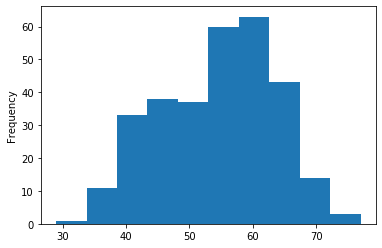

In [18]:
## Checking Age Distribution with histogram
df['age'].plot.hist()

In [19]:
## Heart Disease in correlation to Chest pain type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

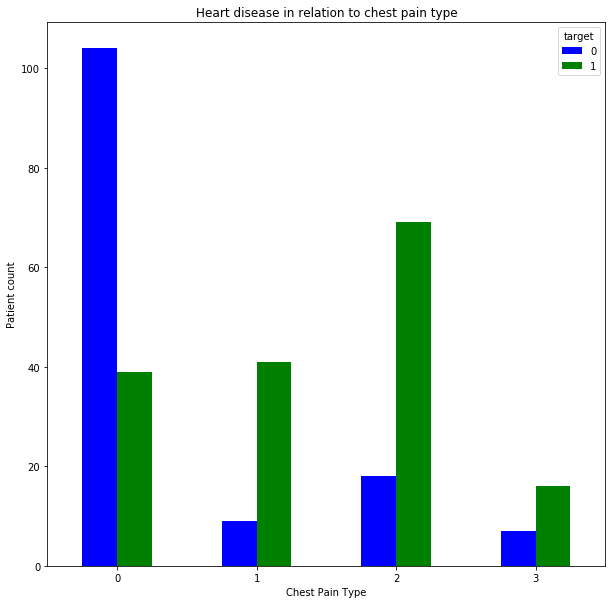

In [20]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,10), color=['Blue', 'Green'])

plt.title('Heart disease in relation to chest pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Patient count')
plt.xticks(rotation=0)

## Correlation Matrix(Positive or negative correlation)

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Visualizing the correlation matrix

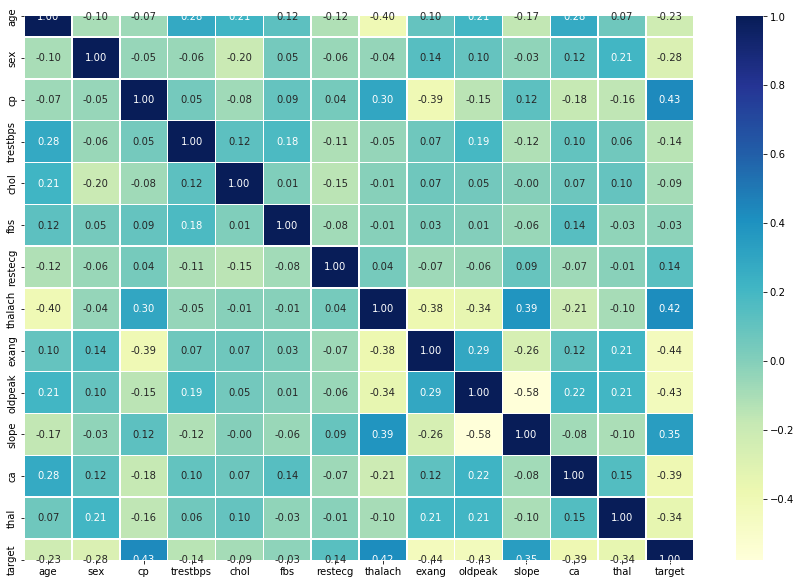

In [22]:
corr_matrix=df.corr() # Correlation Matrix

fig,ax= plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix, annot=True,linewidths=0.5, fmt='0.2f', cmap='YlGnBu') # 'fmt' is like number of digits we want after the decimal point.

### Correlation matrix:- 
Resource -> (https://www.youtube.com/watch?v=xZ_z8KWkhXE)
> This correlation matrix is telling us how chest pain is related to the target column. A 'higher positive' value means a 'potential positive correlation' and a 'higher negative' value means a 'potential negative correlation' or a decrease. 

### Positive Correlation:-

>This means that as 'chest pain(cp)' goes up, the 'target value' also increases now. This is a positive Correlation. As one value increases so as the other.

### Negative Correlation:-

> Negative correlation = A relationship between two variables in which one variable increases as the other decreases. Example, in these case, according to the correlation values, if a patient gets chest pain during exercise(exang=1), their change of having heart disease goes down(target=0). As one increases, so the other decreases.



#### **Model driven EDA -> Building a machine learning model to derive insights of how these independent variables here contribute to the target variable**

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X=df.drop('target', axis='columns')
y=df['target']

In [25]:
len(X),len(y)

(303, 303)

In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
np.random.seed(69)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
len(X_train),len(X_test)

(212, 91)

In [30]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3


In [31]:
y_train

143    1
120    1
76     1
84     1
173    0
      ..
49     1
90     1
107    1
203    0
54     1
Name: target, Length: 212, dtype: int64

### Models we're trying to implement to train the model on the heart disease dataset

* Logistic Regression
* K-Nearest Neighbors Algorithm
* Random Forest Classifier

In [32]:
models={
    'LogisticRegression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
        Fits and evaluates the models we are trying to train with Machine learning algorithms
        models : a dict of different skLearn ML models
    """

    np.random.seed(69)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]= model.score(X_test,y_test)

    return model_scores

In [33]:
scores= fit_and_score(models,X_train,X_test,y_train,y_test)
scores

/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8351648351648352,
 'K-Nearest Neighbors': 0.6703296703296703,
 'Random Forest': 0.8351648351648352}

### Comparing the models

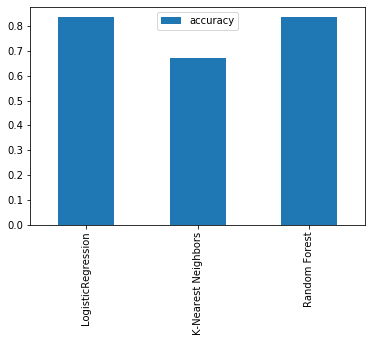

In [34]:
model_compare=pd.DataFrame(scores,index=['accuracy'])
model_compare.T.plot.bar()

## Hyper-parameter tuning

### Steps:-

* By Hand(Eliminated KNN)
* RandomizedSearchCV(Eliminated Random Forest Classifier)
* GridSearchCV

#### K-neighbors Classifier

In [35]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))

    test_scores.append(knn.score(X_test,y_test))

In [36]:
train_scores

[1.0,
 0.8113207547169812,
 0.7783018867924528,
 0.7405660377358491,
 0.75,
 0.7311320754716981,
 0.7311320754716981,
 0.7264150943396226,
 0.7264150943396226,
 0.7028301886792453,
 0.6981132075471698,
 0.6933962264150944,
 0.6981132075471698,
 0.6792452830188679,
 0.6839622641509434,
 0.6745283018867925,
 0.6792452830188679,
 0.6981132075471698,
 0.6933962264150944,
 0.6886792452830188]

In [37]:
test_scores

[0.6043956043956044,
 0.6373626373626373,
 0.7032967032967034,
 0.7142857142857143,
 0.6703296703296703,
 0.6923076923076923,
 0.6703296703296703,
 0.6703296703296703,
 0.6593406593406593,
 0.7032967032967034,
 0.6593406593406593,
 0.7032967032967034,
 0.6813186813186813,
 0.7142857142857143,
 0.6703296703296703,
 0.6813186813186813,
 0.6703296703296703,
 0.6483516483516484,
 0.6483516483516484,
 0.6593406593406593]

In [38]:
np.mean(train_scores), np.mean(test_scores)

(0.729245283018868, 0.673076923076923)

Maximum KNN score is: 71.43%


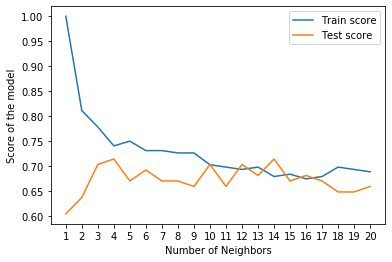

In [39]:
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='Test score')
plt.xticks(np.arange(1,21,1)) ## Gives values from 1 to 21(excluded) with a space of '1'
plt.xlabel('Number of Neighbors')
plt.ylabel('Score of the model')
plt.legend()

print(f'Maximum KNN score is: {max(test_scores)*100:.2f}%')

> Even though for 'n_neighbors =14', the model has a score of around '71%', it is still far less than '83%' which we got with Logistic or Random Forest Algorithms. It is the end for KNN, let's try hyper-tune the other two algorithms and see if we can get a better result from them.

### Randomized SearchCV 

In [40]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [41]:
np.arange(10,1000,50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [42]:
## Logistic Regression
log_reg_grid={"C": np.logspace(-4,4,20), 'solver':['liblinear']}

## Random Forest Classifier 
rf_grid={'n_estimators': np.arange(10,1000,50), "max_depth": [None,3,5,10], 'min_samples_split': np.arange(2,20,2), 'min_samples_leaf': np.arange(1,20,1)}

### Tuning the Logistic Regression

In [43]:
np.random.seed(69)

rs_log_reg=RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid,cv=5,n_iter=20, verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [45]:
rs_log_reg.score(X_test,y_test) # After tuning the logistic regression model, we get the same score as we got when we trained it without any hyper-parameter tuning

0.8351648351648352

### Tuning the Random Forest Classifier

In [46]:
np.random.seed(69)

rs_rand_forest=RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,cv=5,n_iter=20, verbose=True)
rs_rand_forest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
rs_rand_forest.best_params_

{'n_estimators': 710,
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_depth': 3}

In [48]:
rs_rand_forest.score(X_test,y_test)

0.8241758241758241

> The score of the RandomForest Classifier after hyper-parameter tuning has a lower score than the score it got without hyper-parameter tuning. We are dropping RandomForest Classifier here and we will continue with the Logistic Regression

In [49]:
scores

{'LogisticRegression': 0.8351648351648352,
 'K-Nearest Neighbors': 0.6703296703296703,
 'Random Forest': 0.8351648351648352}

### GridSearchCV with Logistic Regression

In [50]:
log_reg_grid={"C": np.logspace(-4,4,30), 'solver':['liblinear']}


gs_log_reg=GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,cv=5,verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [51]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
gs_log_reg.score(X_test,y_test)

0.8351648351648352

In [53]:
scores

{'LogisticRegression': 0.8351648351648352,
 'K-Nearest Neighbors': 0.6703296703296703,
 'Random Forest': 0.8351648351648352}

## Evaluating the Logistic Regression(Classification Problem) Model

Steps:-

* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [54]:
## Creating the predictions of the model

y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1])

In [55]:
y_test

213    0
243    0
291    0
232    0
15     1
      ..
211    0
176    0
200    0
205    0
162    1
Name: target, Length: 91, dtype: int64

### ROC Curve

/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


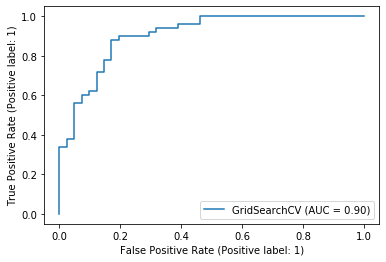

In [56]:
plot_roc_curve(gs_log_reg,X_test,y_test);

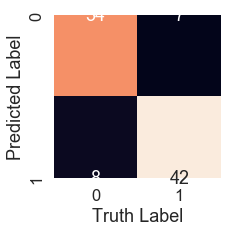

In [57]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
        Plotting a nice looking confusion matrix for the trained model using seaborn's  heatmap()
    """

    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False)

    plt.xlabel('Truth Label')
    plt.ylabel('Predicted Label')

plot_conf_mat(y_test,y_preds)

### Classification Report with Cross-validation

In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [59]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
# Creating the Logistic Regression model with the best parameters we found out from GridSearchCV
clf=LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

# clf.fit(X_train,y_train)
# clf.score(X_test,y_test)

In [61]:
cv_accuracy=cross_val_score(clf,X,y,cv=10,scoring='accuracy')
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.8348387096774192

In [62]:
cv_precision=cross_val_score(clf,X,y,cv=10,scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.8196647869674185

In [63]:
cv_recall=cross_val_score(clf,X,y,cv=10,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.9018382352941178

In [64]:
cv_f1=cross_val_score(clf,X,y,cv=10,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8557888114080064

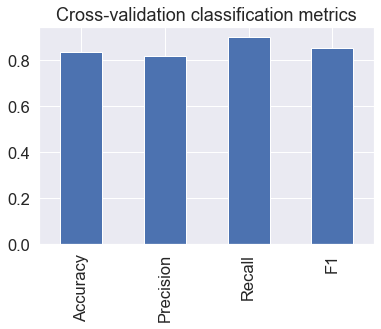

In [65]:
## Visualizing the Cross-validation Evaluation Metric

cv_metrics=pd.DataFrame({'Accuracy': cv_accuracy,'Precision': cv_precision,'Recall': cv_recall,'F1': cv_f1},index=[0])
cv_metrics.T.plot.bar(title='Cross-validation classification metrics', legend=False);

## Finding the Important Features or Feature Importance

> Feature importance means out of all the features shown/listed by the patients in the dataset we were given, the features which have the most significance/contribution to the outcome that if a patient has heart disease or not.

#### Finding feature importance is different for each machine learning model.

In [66]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.20433597178569418, solver='liblinear')>

In [67]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [68]:
clf.coef_

array([[-0.00925337, -0.89482634,  0.76488736, -0.0107188 , -0.00146032,
        -0.0434013 ,  0.35144997,  0.02490162, -0.49703991, -0.67504936,
         0.31168198, -0.48853816, -0.44662706]])

In [69]:
clf.coef_.shape

(1, 13)

In [70]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.009253374252782281,
 'sex': -0.8948263393642228,
 'cp': 0.7648873620800811,
 'trestbps': -0.010718796635866674,
 'chol': -0.0014603170766804017,
 'fbs': -0.04340130470604545,
 'restecg': 0.3514499676017488,
 'thalach': 0.024901622694506225,
 'exang': -0.49703990563740275,
 'oldpeak': -0.6750493561200523,
 'slope': 0.31168198339443787,
 'ca': -0.48853815747230406,
 'thal': -0.4466270621605401}

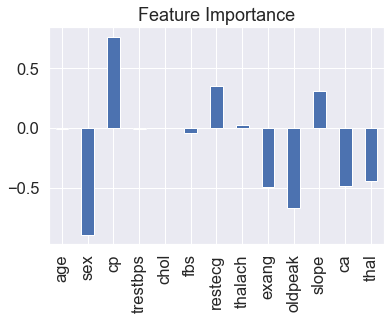

In [71]:
# Visualizing the feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False)

In [72]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [73]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Experimentation and improving the model

> If we haven't hit the evaluation metric yet then what we should do after that..... 

* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we improve the current models?
* If the model is good enough( It is on pass with the evaluation metric we have set at the start of this project), export it and share with others.

### Trying to improve the Logistic Regression model

In [74]:
log_reg_grid={'penalty': ['l1','l2','elasticnet','none'] ,"C": np.logspace(-4,4,30), 'solver':['lbfgs','liblinear','newton-cg','sag','saga'], 'max_iter': [100,1000,2500,5000]}


gs_log_reg=GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,cv=5,verbose=True,n_jobs=-1)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             verbose=True)

In [75]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [76]:
gs_log_reg.score(X_test,y_test)

0.8351648351648352

In [77]:
y_preds= gs_log_reg.predict(X_test)

In [78]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



### There is an implementation/version of the **Gradient Boosting** within the skLearn library, let's try that first.

In [79]:
accuracy={}
speed={}

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [81]:
from time import time
gb_skl=GradientBoostingClassifier()

start=time()

ggb_skl_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=69)
gb_skl_score=cross_val_score(gb_skl,X,y,scoring='accuracy',cv=ggb_skl_cv, n_jobs=-1)

speed['Gradient Boosting']=np.round(time() -start,3)
accuracy['Gradient Boosting']=np.mean(gb_skl_score).round(3)

print(f"Mean Accuracy:{accuracy['Gradient Boosting']}\nStd: {np.std(gb_skl_score): .3f}\nRun time: {speed['Gradient Boosting']}s")

Mean Accuracy:0.784
Std:  0.028
Run time: 0.54s


In [82]:
from time import time
gb_skl=GradientBoostingClassifier()

start=time()

gb_skl_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=69)
gb_skl_score=cross_val_score(gb_skl,X_train,y_train,scoring='accuracy',cv=gb_skl_cv, n_jobs=-1)

speed['Gradient Boosting']=np.round(time() -start,3)
accuracy['Gradient Boosting']=np.mean(gb_skl_score).round(3)

print(f"Mean Accuracy:{accuracy['Gradient Boosting']}\nStd: {np.std(gb_skl_score): .3f}\nRun time: {speed['Gradient Boosting']}s")

Mean Accuracy:0.785
Std:  0.073
Run time: 0.387s


### **Alternative** to the Gradient Boosting Classifier, it is based on **LightGBM**. It is a faster algorithm compared to the GradientBoosting algorithm from above

In [83]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [84]:
from time import time
hist_gb_skl=HistGradientBoostingClassifier()

start=time()

hist_gb_skl_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=69)
hist_gb_skl_score=cross_val_score(hist_gb_skl,X_train,y_train,scoring='accuracy',cv=hist_gb_skl_cv, n_jobs=-1)

speed['HistGradient Boosting']=np.round(time() -start,3)
accuracy['HistGradient Boosting']=np.mean(gb_skl_score).round(3)

print(f"Mean Accuracy:{accuracy['HistGradient Boosting']}\nStd: {np.std(hist_gb_skl_score): .3f}\nRun time: {speed['HistGradient Boosting']}s")

Mean Accuracy:0.785
Std:  0.070
Run time: 0.566s


## XGBoost 
 
**pip install xgboost**

In [85]:
from xgboost import XGBClassifier

In [86]:
from time import time
xgb=XGBClassifier()

start=time()

xgb_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=69)
xgb_score=cross_val_score(xgb,X_train,y_train,scoring='accuracy',cv=xgb_cv, n_jobs=-1)

speed['XGBClassifier']=np.round(time() -start,3)
accuracy['XGBClassifier']=np.mean(gb_skl_score).round(3)

print(f"Mean Accuracy:{accuracy['XGBClassifier']}\nStd: {np.std(xgb_score): .3f}\nRun time: {speed['XGBClassifier']}s")

/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/arghanath/anaconda3/envs/h

[15:48:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean Accuracy:0.785
Std:  0.076
Run time: 245.621s


In [87]:
from time import time
xgb=XGBClassifier()

start=time()

xgb_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=69)
xgb_score=cross_val_score(xgb,X,y,scoring='accuracy',cv=xgb_cv, n_jobs=-1)

speed['XGBClassifier']=np.round(time() -start,3)
accuracy['XGBClassifier']=np.mean(gb_skl_score).round(3)

print(f"Mean Accuracy:{accuracy['XGBClassifier']}\nStd: {np.std(xgb_score): .3f}\nRun time: {speed['XGBClassifier']}s")

/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/arghanath/anaconda3/envs/h

[15:52:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean Accuracy:0.785
Std:  0.025
Run time: 274.443s


## LightGBM

**pip install lightgbm**

In [88]:
from lightgbm import LGBMClassifier

In [89]:
from time import time
lgbm=LGBMClassifier()

start=time()

lgbm_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=69)
lgbm_score=cross_val_score(lgbm,X,y,scoring='accuracy',cv=lgbm_cv, n_jobs=-1)

speed['LGBMClassifier']=np.round(time() -start,3)
accuracy['LGBMClassifier']=np.mean(gb_skl_score).round(3)

print(f"Mean Accuracy:{accuracy['LGBMClassifier']}\nStd: {np.std(lgbm_score): .3f}\nRun time: {speed['LGBMClassifier']}s")

Mean Accuracy:0.785
Std:  0.028
Run time: 1.269s


In [90]:
from time import time
lgbm=LGBMClassifier()

start=time()

lgbm_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=69)
lgbm_score=cross_val_score(lgbm,X_train,y_train,scoring='accuracy',cv=lgbm_cv, n_jobs=-1)

speed['LGBMClassifier']=np.round(time() -start,3)
accuracy['LGBMClassifier']=np.mean(gb_skl_score).round(3)

print(f"Mean Accuracy:{accuracy['LGBMClassifier']}\nStd: {np.std(lgbm_score): .3f}\nRun time: {speed['LGBMClassifier']}s")

Mean Accuracy:0.785
Std:  0.071
Run time: 0.128s


## Catboost

**pip install catboost**

In [91]:
from catboost import CatBoostClassifier

In [92]:
from time import time
catb=CatBoostClassifier()

start=time()

catb_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=69)
catb_score=cross_val_score(catb,X_train,y_train,scoring='accuracy',cv=catb_cv, n_jobs=-1)

speed['CatBoostClassifier']=np.round(time() -start,3)
accuracy['CatBoostClassifier']=np.mean(gb_skl_score).round(3)

print(f"Mean Accuracy:{accuracy['CatBoostClassifier']}\nStd: {np.std(catb_score): .3f}\nRun time: {speed['CatBoostClassifier']}s")

Learning rate set to 0.004834
Learning rate set to 0.004822
Learning rate set to 0.004834
Learning rate set to 0.004822
Learning rate set to 0.004822
Learning rate set to 0.004822
Learning rate set to 0.004834
Learning rate set to 0.004834
0:	learn: 0.6903900	total: 64.9ms	remaining: 1m 4s
0:	learn: 0.6886226	total: 65.4ms	remaining: 1m 5s
0:	learn: 0.6891029	total: 65.9ms	remaining: 1m 5s
0:	learn: 0.6886809	total: 66.1ms	remaining: 1m 6s
1:	learn: 0.6848718	total: 66.7ms	remaining: 33.3s
0:	learn: 0.6894839	total: 66.9ms	remaining: 1m 6s
0:	learn: 0.6886206	total: 66.5ms	remaining: 1m 6s
1:	learn: 0.6849597	total: 67.1ms	remaining: 33.5s
1:	learn: 0.6849418	total: 67.6ms	remaining: 33.7s
1:	learn: 0.6857316	total: 68.4ms	remaining: 34.1s
1:	learn: 0.6855211	total: 68ms	remaining: 33.9s
2:	learn: 0.6811462	total: 67.7ms	remaining: 22.5s
1:	learn: 0.6861194	total: 69.2ms	remaining: 34.6s
2:	learn: 0.6812179	total: 69.9ms	remaining: 23.2s
2:	learn: 0.6823323	total: 70.6ms	remaining: 23.

In [93]:
print("Accuracy: ")
{k: v for k, v in sorted(accuracy.items(), key=lambda i: i[1], reverse=True)}

Accuracy: 


{'Gradient Boosting': 0.785,
 'HistGradient Boosting': 0.785,
 'XGBClassifier': 0.785,
 'LGBMClassifier': 0.785,
 'CatBoostClassifier': 0.785}

In [94]:
print("Speed: ")
{k: v for k, v in sorted(speed.items(), key=lambda i: i[1], reverse=False)}

Speed: 


{'LGBMClassifier': 0.128,
 'Gradient Boosting': 0.387,
 'HistGradient Boosting': 0.566,
 'CatBoostClassifier': 19.199,
 'XGBClassifier': 274.443}

### Trying Random Forest Classifier

In [95]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [96]:
y_predict = rf.predict(X_test)
y_pred_quant = rf.predict_proba(X_test)[:, 1]
y_pred_bin = rf.predict(X_test)

In [97]:
cf_matrix=confusion_matrix(y_test,y_pred_bin)
cf_matrix

array([[33,  8],
       [ 7, 43]])

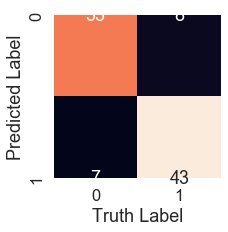

In [98]:
plot_conf_mat(y_test,y_pred_bin)

> These types of diagnostic tests are often sold based on the metrics of sensitivity and specificity.

<br/>
<img src='./Photos/Sensitivity_Specificity.png'>

In [99]:
total=sum(sum(cf_matrix))

sensitivity=cf_matrix[0,0]/(cf_matrix[0,0]+ cf_matrix[1,0]) ## sensitivity=confusion_matrix[0,0]/(confusion_matrix[0,0]+ confusion_matrix[0,1])
print('Sensitivity: ', sensitivity)

Sensitivity:  0.825


In [100]:
total=sum(sum(cf_matrix))

specificity=cf_matrix[1,1]/(cf_matrix[1,1]+ cf_matrix[0,1]) ## sensitivity=confusion_matrix[0,0]/(confusion_matrix[0,0]+ confusion_matrix[0,1])
print('Specificity: ', specificity)

Specificity:  0.8431372549019608


/home/arghanath/anaconda3/envs/heart_disease/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


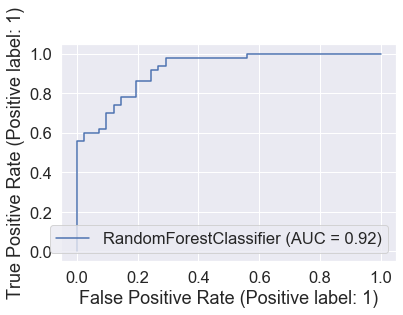

In [101]:
plot_roc_curve(rf,X_test,y_test);

In [102]:
from sklearn.metrics import roc_curve, auc

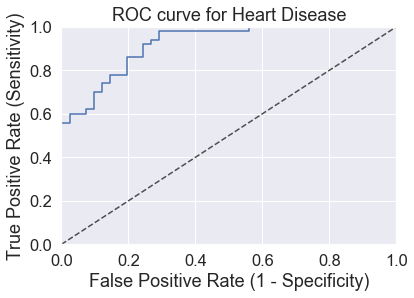

In [103]:
fpr,tpr,thresholds= roc_curve(y_test,y_pred_quant) # 'fpr' -> False Positive Rate, 'tpr' -> True positive rate

fig,ax=plt.subplots()
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=12
plt.title('ROC curve for Heart Disease')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

>Another common metric is the **Area Under the Curve, or AUC**. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

* 0.90 - 1.00 = excellent
* 0.80 - 0.90 = good
* 0.70 - 0.80 = fair
* 0.60 - 0.70 = poor
* 0.50 - 0.60 = fail


In [104]:
auc(fpr,tpr)

0.9204878048780487

> '.92' means excellent from the above points and our model is working as expected.

### Finding the important features from the dataset

## Permutation Importance

In [105]:
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance

In [106]:
perm=PermutationImportance(rf, random_state=69).fit(X_test,y_test)
eli5.show_weights(perm,feature_names=X_test.columns.tolist())

Weight,Feature
0.0505 ± 0.0298,ca
0.0264 ± 0.0298,cp
0.0264 ± 0.0264,thal
0.0176 ± 0.0108,restecg
0.0132 ± 0.0352,sex
0.0132 ± 0.0164,exang
0.0088 ± 0.0088,trestbps
0.0066 ± 0.0108,chol
0.0000 ± 0.0393,oldpeak
0 ± 0.0000,fbs


In [107]:
# Used for partial plots
from pdpbox import *

In [108]:
base_features=df.columns.values.tolist()
base_features.remove('target')

feature_name='Number_of_major_vessels'
dist=pdp.PDPIsolate(model=rf, dataset=X_test, model_features=base_features,feature=feature_name)

pdpbox.pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

NameError: name 'pdp' is not defined

## SHAP Values 

> The usage/work of the **SHAP** values is by showing the influence of the values of every variable in a single row, compared to their baseline values.

**pip install numba==0.53** 

pip install numba(Lastest version was 0.54) was giving error "Numba needs NumPy 1.20 or less"

In [109]:
import shap # For SHAP values

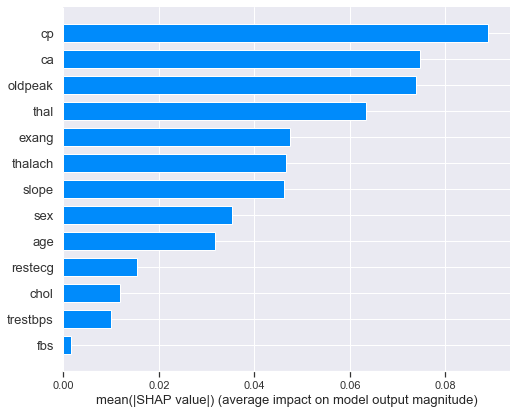

In [110]:
explainer=shap.TreeExplainer(rf)
shap_values=explainer.shap_values(X_test)

shap.summary_plot(shap_values[1],X_test,plot_type='bar')

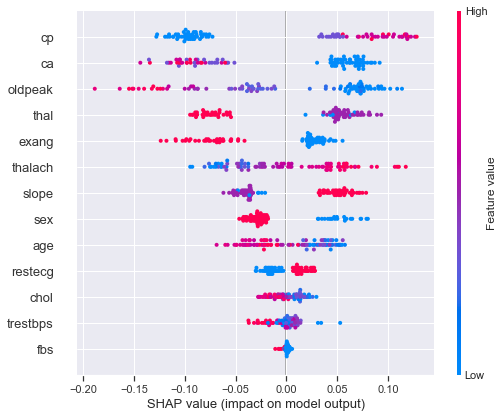

In [111]:
shap.summary_plot(shap_values[1],X_test)

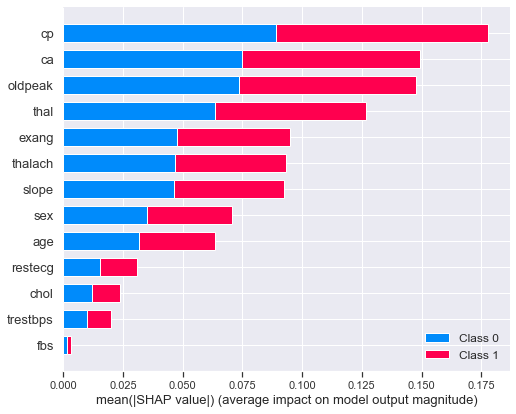

In [112]:
shap.summary_plot(shap_values,X_test)

> Let's try and change/various/different variables and note the outcomes of the changes on an individual/single patient.

In [113]:
def heart_disease_risk_factors(model, patient):
    explainer=shap.TreeExplainer(model)
    shap_values=explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1],patient, plot_cmap='PkYg', matplotlib=True)

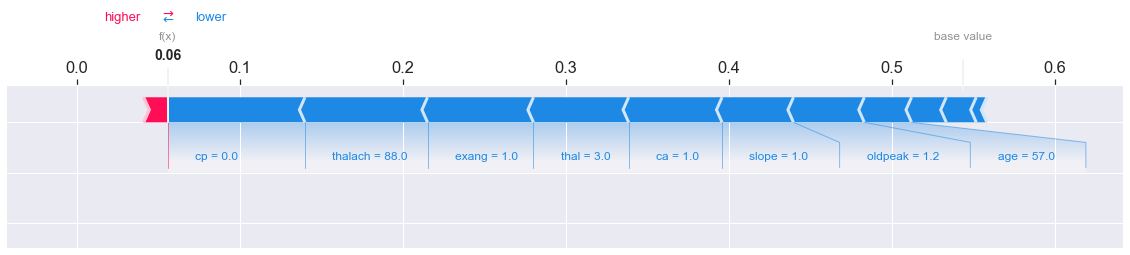

In [114]:
data_predictions=X_test.iloc[1, :].astype(float)
heart_disease_risk_factors(rf,data_predictions)

> For this particular patient, we can see that their chances/prediction is 0.06% or mere 6%, compared to the base value of around 0.5 or 50% shown in the above plot.

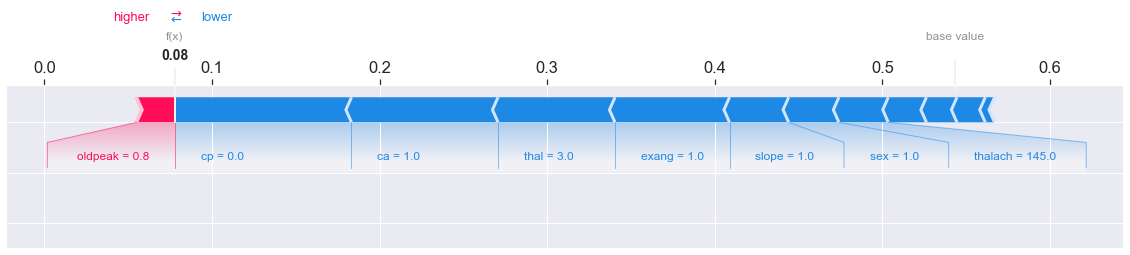

In [115]:
data_predictions = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(rf, data_predictions)

> For this particular patient, we can see that their chances/prediction is 0.08% or mere 8%, compared to the base value of around 0.5 or 50% shown in the above plot.

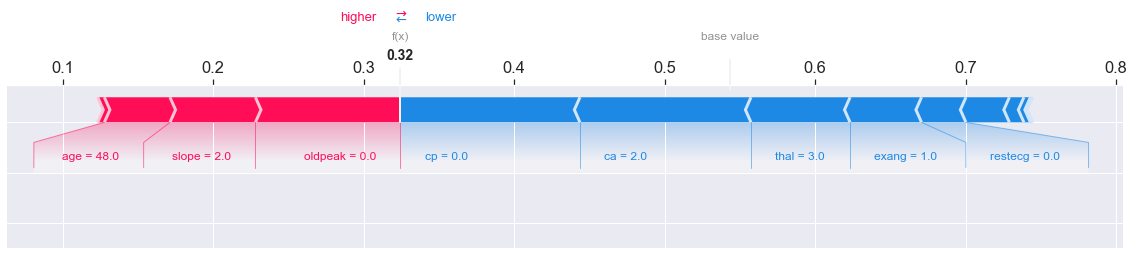

In [117]:
data_predictions = X_test.iloc[5,:].astype(float)
heart_disease_risk_factors(rf, data_predictions)

> For this particular patient, we can see that their chances/prediction is 0.32% or 32%, compared to the base value of around 0.5 or 50% shown in the above plot.

### SHAP dependence contribution plots

In [119]:
# ax2=fig.add_subplot(224)
# shap.dependence_plot('cp', shap_values[1],X_test, interaction_index='st_depression')

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ValueError: Could not find feature named: st_depression

In [123]:
sns.set_theme()

In [141]:
# ax.set_facecolor('Red')
shap_values=explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1],shap_values[1],X_test.iloc[:50],plot_cmap="DrDb")

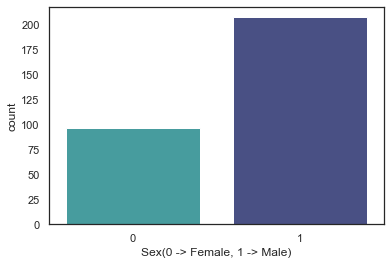

In [142]:
sns.countplot(x='sex', data=df, palette='mako_r')
plt.xlabel('Sex(0 -> Female, 1 -> Male)')
plt.show()

In [143]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


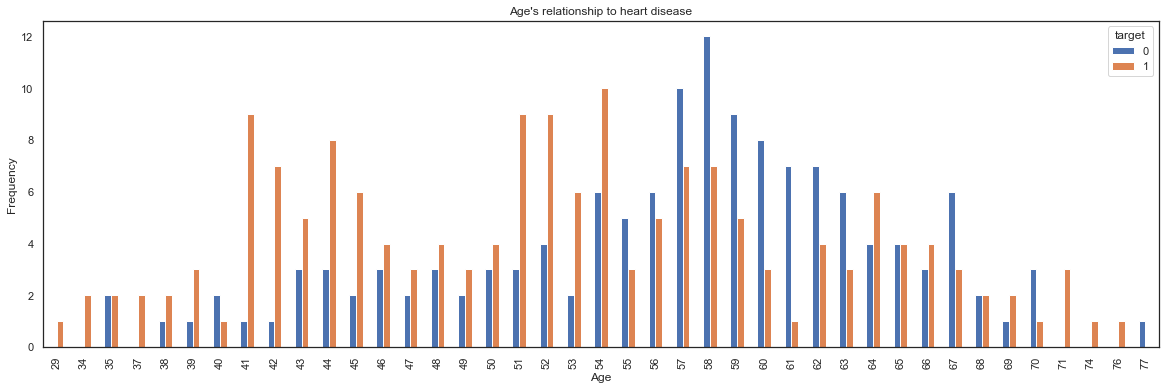

In [146]:
pd.crosstab(df['age'],df['target']).plot(kind='bar',figsize=(20,6))
plt.title("Age's relationship to heart disease")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('./Photos/Age_relationship_heart_disease.png')
plt.show()

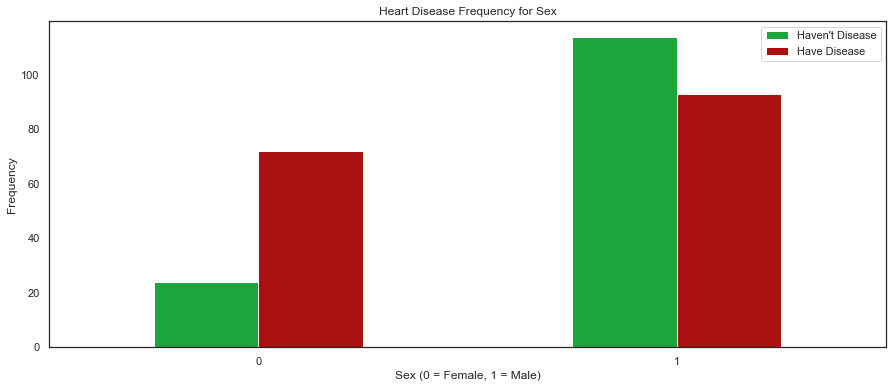

In [149]:
pd.crosstab(df['sex'],df['target']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

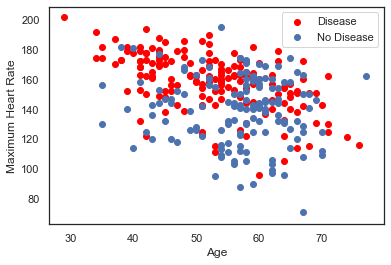

In [153]:
plt.scatter(x=df.age[df.target == 1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target == 0], y=df.thalach[(df.target==0)])
plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()


In [154]:
df.slope

0      0
1      0
2      2
3      2
4      2
      ..
298    1
299    1
300    1
301    1
302    1
Name: slope, Length: 303, dtype: int64

In [156]:
df['slope'].unique()

array([0, 2, 1])

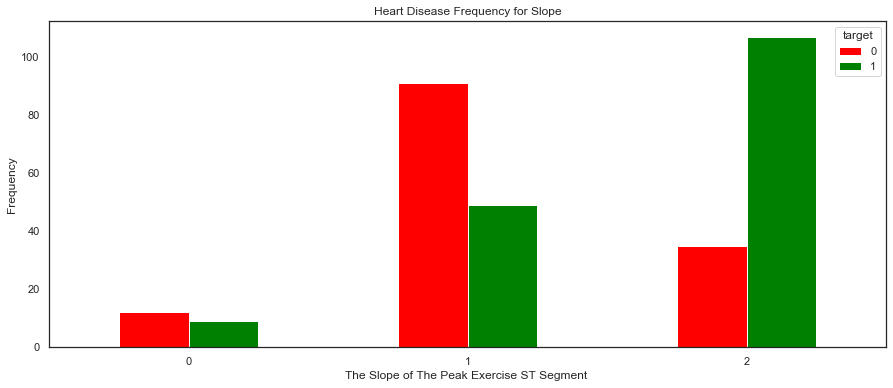

In [157]:
pd.crosstab(df['slope'],df['target']).plot(kind='bar', figsize=(15,6), color=['Red', 'Green'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

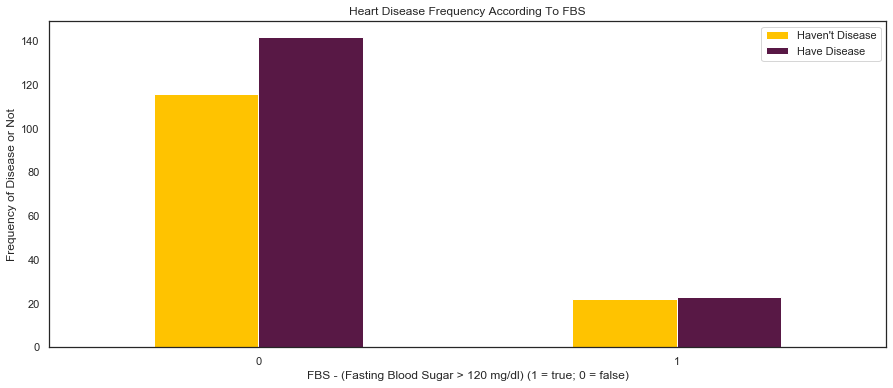

In [158]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

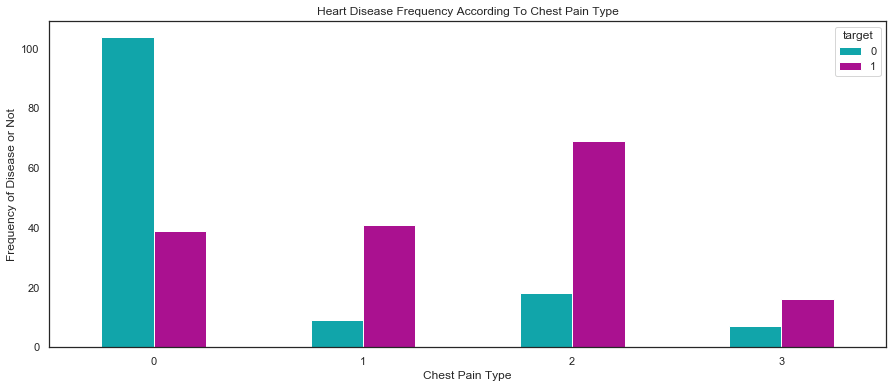

In [159]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [160]:
cp = pd.get_dummies(df['cp'], prefix = "cp")
thal = pd.get_dummies(df['thal'], prefix = "thal")
slope = pd.get_dummies(df['slope'], prefix = "slope")

In [162]:
dict=[df,cp,thal,slope]
df=pd.concat(dict, axis='columns')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [163]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [202]:
x_data=df.drop(['target'], axis='columns')
y=df['target'].values

## Normalizing the data

In [203]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [205]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [206]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [207]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head


In [208]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [209]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [210]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [211]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3597736123664534


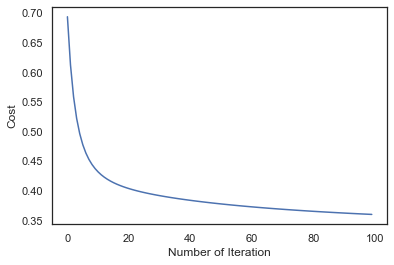

Manuel Test Accuracy: 86.89%


In [212]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [180]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


In [213]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.05%


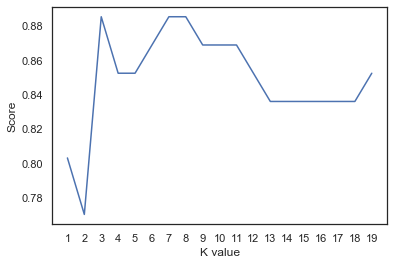

Maximum KNN Score is 88.52%


In [214]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [215]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.52%


In [216]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


In [217]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 75.41%


In [218]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


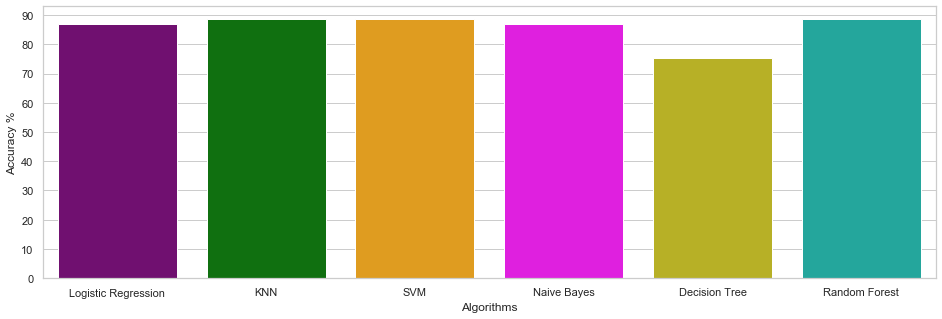

In [219]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()